In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
file_path = os.path.join('D:', 'MINI PROJECT', 'Data', 'train.csv')
df = pd.read_csv(file_path)


In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


  preprocess
 

In [4]:
from tensorflow.keras.layers import TextVectorization

In [5]:
x=df['comment_text']
y=df[df.columns[2: ]].values

In [6]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [7]:
x

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [8]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [9]:
Max_features =  200000 #num of words

In [10]:
vectorizer=TextVectorization(max_tokens=Max_features,
                             output_sequence_length=1800,
                             output_mode='int')

In [11]:
vectorizer.adapt(x.values)

In [12]:
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263, 306,   9, 275], dtype=int64)>

In [13]:
# vectorizer.get_vocabulary()

In [14]:
vectorized_text=vectorizer(x.values)

In [15]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [16]:
dataset=tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset=dataset.cache()
dataset=dataset.shuffle(160000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)

In [17]:
batch_x,batch_y=dataset.as_numpy_iterator().next()

In [18]:
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [19]:
train.as_numpy_iterator().next()

(array([[   972, 116202,     11, ...,      0,      0,      0],
        [ 51977,    277,     14, ...,      0,      0,      0],
        [   425,      9,     14, ...,      0,      0,      0],
        ...,
        [    10,    800,      9, ...,      0,      0,      0],
        [    29,    156,   5700, ...,      0,      0,      0],
        [   312,     14,      9, ...,      0,      0,      0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

DEEP LEARNING NETWORK

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional,Dense,Embedding

In [23]:
model=Sequential()

model.add(Embedding(Max_features+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh')))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='sigmoid'))

In [24]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                      

In [28]:
history=model.fit(train,epochs=1,validation_data=val)

6981/6981 [==============================] - 7188s 1s/step - loss: 0.0635 - val_loss: 0.0458


In [29]:
history.history

{'loss': [0.06349288672208786], 'val_loss': [0.04582860320806503]}

In [30]:
# from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

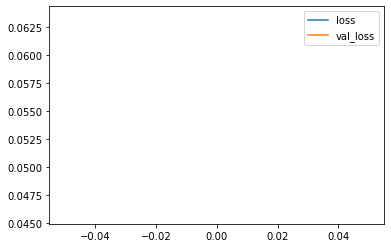

In [32]:
# plt.figure(figsize=(8,5))
# pd.DataFrame(history.history).plot()
# plt.show()

prediction

In [33]:
batch=test.as_numpy_iterator().next()

In [34]:
input_text=vectorizer("You are good")

In [36]:
model.predict(np.array([input_text]))

1/1 [==============================] - 2s 2s/step


array([[0.23065393, 0.00136622, 0.04006227, 0.00618403, 0.06984252,
        0.01991032]], dtype=float32)

In [38]:
batch = test.as_numpy_iterator().next()


In [40]:
batch_x,batch_y = test.as_numpy_iterator().next()

In [43]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [42]:
(model.predict(batch_x)>0.5).astype(int)

1/1 [==============================] - 0s 280ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [44]:
res=model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 199ms/step


Evaluate

In [45]:
from tensorflow.keras.metrics import Precision,Recall,CategoricalAccuracy

In [46]:
pre=Precision()
re=Recall()
acc=CategoricalAccuracy()

In [50]:
for batch in test.as_numpy_iterator():
    x_true,y_true=batch
    yhat=model.predict(x_true)
    y_true=y_true.flatten()
    yhat=yhat.flatten()
    
    pre.update_state(y_true,yhat)
    re.update_state(y_true,yhat)
    acc.update_state(y_true,yhat)
    

1/1 [==============================] - 0s 254ms/step


In [53]:
print("precision : ",pre.result().numpy())

precision :  0.7966635


In [55]:
print("Recall : ",re.result().numpy())

Recall :  0.7266724


In [54]:
print("Accuracy : ",acc.result().numpy())

Accuracy :  0.4884654


In [72]:
input_text=vectorizer(input("Enter the comment : "))
prediction = model.predict(np.array([input_text]))
column_names = df.columns[2:]

prediction_df = pd.DataFrame(prediction, columns=column_names)

print(prediction_df)


Enter the comment : kill you
1/1 [==============================] - 0s 87ms/step
      toxic  severe_toxic   obscene  threat    insult  identity_hate
0  0.899442       0.05133  0.599661  0.0257  0.530948       0.097762


In [56]:
import pickle

In [57]:
filename='model.pkl'

In [59]:
with open(filename, 'wb') as file:
    pickle.dump(model, file)